# Long COVID coding in primary care

This notebook follows on from our [published paper](https://bjgp.org/content/early/2021/06/28/BJGP.2021.0301/tab-article-info), and contains much of the same analysis. It is intended to be updated regularly.

## Background
Long COVID describes new or persistent symptoms at least four weeks after onset of acute COVID-19. Clinical codes to describe this were recently created. Aim: To describe the use of long COVID codes, and variation of use by general practice, demographics and over time.

## Methods

Working on behalf of NHS England, we used OpenSAFELY data encompassing 96% of the English population. We measured the proportion of people with a recorded code for long COVID, overall and by demographic factors, electronic health record software system (EMIS or TPP), and week. Detailed methods are the same as described in the original paper.

In [1]:
from datetime import datetime
from IPython.display import display, Markdown
import pandas as pd
pd.set_option("display.max_rows", 200)
pd.options.display.float_format = "{:,.1f}".format
import lib

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
tpp = lib.tpp_emis_table_format("output", {"0": "Missing"})
total_tpp = tpp.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_tpp = total_tpp.sum()
emis = lib.tpp_emis_table_format("emis", {"RGN11NM": "region","0": "Missing","6": "Missing"})
total_emis = emis.loc["sex",["No long COVID", "Long COVID"]].sum()
all_total_emis = total_emis.sum()
totals = tpp[["No long COVID", "Long COVID"]] + emis[["No long COVID", "Long COVID"]]

display(Markdown(f"### Report last updated **{datetime.today().strftime('%d %b %Y')}**"))

### Report last updated **03 Aug 2021**

## Results

### Table 1: Characteristics of the cohort

In [4]:
float_formatter = "{:,.0f}".format
total, table_1 = lib.get_table_1([tpp, emis, totals])
display(Markdown(f"There were {float_formatter(total[('Totals','Patient count')])} people in the cohort in total. In practices that use TPP software, there were {float_formatter(total[('TPP','Patient count')])}, while in practices that use EMIS software, there were {float_formatter(total[('EMIS','Patient count')])} people."))
display(table_1)

There were 57,604,767 people in the cohort in total. In practices that use TPP software, there were 24,106,715, while in practices that use EMIS software, there were 33,498,052 people.

TPP               EMIS       \
                                   Patient count    % Patient count    %   
age_group 0-17                           4839942 20.1       6809559 20.3   
          18-24                          1907505  7.9       2810350  8.4   
          25-34                          3348750 13.9       4836057 14.4   
          35-44                          3230713 13.4       4670118 13.9   
          45-54                          3244760 13.5       4494561 13.4   
          55-69                          4222719 17.5       5635349 16.8   
          70-79                          2092008  8.7       2670982  8.0   
          80+                            1220318  5.1       1571076  4.7   
sex       F                             12052904 50.0      16740654 50.0   
          M                             12053811 50.0      16757398 50.0   
region    East Midlands                  4192331 17.4        755209  2.3   
          London                         1700812  7.1       7667631 22.9   
          North East                     1119823  4.6       1180482  3.5   
          North West                     2067400  8.6       6788243 20.3   
          South East                     1606770  6.7       7080996 21.1   
          South West                     3308916 13.7       2443955  7.3   
          West Midlands                   992257  4.1       4993534 14.9   
          Yorkshire and The Humber       3442158 14.3       1240398  3.7   
imd       Missing                         587847  2.4         98704  0.3   
          Most deprived 1                4825962 20.0       6912078 20.6   
          2                              4717661 19.6       7122528 21.3   
          3                              4975649 20.6       6507147 19.4   
          4                              4684045 19.4       6298817 18.8   
          Least deprived 5               4315551 17.9       6558778 19.6   
ethnicity Missing                        6646638 27.6      10869822 32.4   
          White                         14647551 60.8      17635728 52.6   
          Mixed                           320225  1.3        579138  1.7   
          South Asian                    1500486  6.2       2493105  7.4   
          Black                           515849  2.1       1168966  3.5   
          Other                           475966  2.0        751293  2.2   

                                          Totals       
                                   Patient count    %  
age_group 0-17                          11649501 20.2  
          18-24                          4717855  8.2  
          25-34                          8184807 14.2  
          35-44                          7900831 13.7  
          45-54                          7739321 13.4  
          55-69                          9858068 17.1  
          70-79                          4762990  8.3  
          80+                            2791394  4.8  
sex       F                             28793558 50.0  
          M                             28811209 50.0  
region    East Midlands                  4947540  9.8  
          London                         9368443 18.5  
          North East                     2300305  4.5  
          North West                     8855643 17.5  
          South East                     8687766 17.2  
          South West                     5752871 11.4  
          West Midlands                  5985791 11.8  
          Yorkshire and The Humber       4682556  9.3  
imd       Missing                         686551  1.2  
          Most deprived 1               11738040 20.4  
          2                             11840189 20.6  
          3                             11482796 19.9  
          4                             10982862 19.1  
          Least deprived 5              10874329 18.9  
ethnicity Missing                       17516460 30.4  
          White                         32283279 56.0  
          Mixed                           89

### Table 2: Counts and rates of long COVID coding stratified by demographic variable

In [5]:
total, table_2 = lib.get_table_2([tpp, emis, totals])
display(Markdown(f"There were {float_formatter(total[('Totals','Long COVID')])} people who have been given a diagnostic code for long COVID to date. Counts for each software system are:"))
print(total.loc[(slice(None), "Long COVID")])
display(Markdown(f"The overall rate of long COVID coding in the population was {float_formatter(total[('Totals','Rate per 100,000')])} per 100,000 people. Rates for each software system are:"))
print(total.loc[(slice(None), "Rate per 100,000")])
table_2

There were 43,740 people who have been given a diagnostic code for long COVID to date. Counts for each software system are:

TPP      11,501.0
EMIS     32,239.0
Totals   43,740.0
dtype: float64


The overall rate of long COVID coding in the population was 152 per 100,000 people. Rates for each software system are:

TPP       95.4
EMIS     192.5
Totals   151.9
dtype: float64


TPP                        \
                                   Long COVID Rate per 100,000    %   
age_group 0-17                            273              5.6  2.4   
          18-24                           685             35.9  6.0   
          25-34                          1514             45.2 13.2   
          35-44                          2326             72.0 20.2   
          45-54                          3024             93.2 26.3   
          55-69                          2952             69.9 25.7   
          70-79                           532             25.4  4.6   
          80+                             195             16.0  1.7   
sex       F                              7266             60.3 63.2   
          M                              4235             35.1 36.8   
region    East Midlands                  2102             50.1 18.3   
          London                          640             37.6  5.6   
          North East                      671             59.9  5.8   
          North West                      792             38.3  6.9   
          South East                     1347             83.8 11.7   
          South West                     1427             43.1 12.4   
          West Midlands                   476             48.0  4.1   
          Yorkshire and The Humber       2133             62.0 18.5   
imd       Missing                         262             44.6  2.3   
          Most deprived 1                2125             44.0 18.5   
          2                              2250             47.7 19.6   
          3                              2442             49.1 21.2   
          4                              2261             48.3 19.7   
          Least deprived 5               2161             50.1 18.8   
ethnicity Missing                        2634             39.6 22.9   
          White                          7382             50.4 64.2   
          Mixed                           140             43.7  1.2   
          South Asian                     986             65.7  8.6   
          Black                           195             37.8  1.7   
          Other                           164             34.5  1.4   

                                         EMIS                        \
                                   Long COVID Rate per 100,000    %   
age_group 0-17                            766             11.2  2.4   
          18-24                          1410             50.2  4.4   
          25-34                          4152             85.9 12.9   
          35-44                          7122            152.5 22.1   
          45-54                          8694            193.4 27.0   
          55-69                          8406            149.2 26.1   
          70-79                          1299             48.6  4.0   
          80+                             390             24.8  1.2   
sex       F                             20640            123.3 64.0   
          M                             11599             69.2 36.0   
region    East Midlands                   529             70.0  1.6   
          London                         8277            107.9 25.7   
          North East                     1271            107.7  3.9   
          North West                     7932            116.8 24.6   
          South East                     5837             82.4 18.1   
          South West                     1928             78.9  6.0   
          West Midlands                  4517             90.5 14.0   
          Yorkshire and The Humber       1020             82.2  3.2   
imd       Missing                          75             76.0  0.2   
          Most deprived 1                7312            105.8 22.7   
          2                              7754            108.9 24.1   
          3                              6139             94.3 19.0   
          4                              5721             90.8 17

### Figure 1: Volume of code use in individual practices
Stratified by the electronic health record provider of the practice (TPP/SystmOne or EMIS).

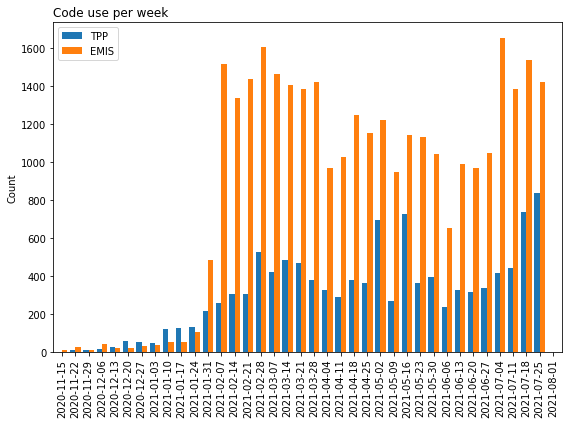

In [6]:
lib.code_use_per_week_graph()

### Figure 2: Use of long COVID codes over time
Stratified by the electronic health record provider of the practice (TPP/SystmOne or EMIS). Reporting lag may affect recent dates.

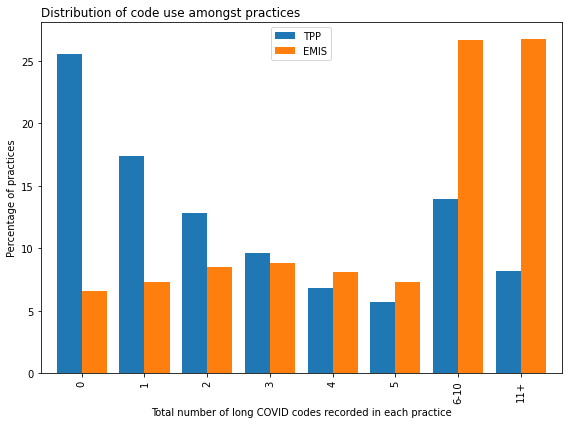

In [7]:
lib.practice_distribution_graph()

### Table 3: Total use of each individual long COVID related code
This is distinct from table 2 in that it counts all coded events, including where patients have been coded more than once.

In [8]:
total, codes_tpp = lib.smoosh_codes_tables()
total = total[(slice(None), "Total records")]
display(Markdown(f"There were {float_formatter(total['Total'])} long COVID codes used in total. Counts for each software system were:"))
print(total)
codes_tpp

There were 76,331 long COVID codes used in total. Counts for each software system were:

TPP     16,452.0
EMIS    60,026.0
Total   76,331.0
dtype: float64


\
                                                               term   
code                                                                  
1325161000000102                             Post-COVID-19 syndrome   
1325181000000106  Ongoing symptomatic disease caused by severe a...   
1325021000000106                 Signposting to Your COVID Recovery   
1325031000000108           Referral to post-COVID assessment clinic   
1325041000000104  Referral to Your COVID Recovery rehabilitation...   
1325051000000101  Newcastle post-COVID syndrome Follow-up Screen...   
1325061000000103  Assessment using Newcastle post-COVID syndrome...   
1325071000000105   COVID-19 Yorkshire Rehabilitation Screening tool   
1325081000000107  Assessment using COVID-19 Yorkshire Rehabilita...   
1325091000000109  Post-COVID-19 Functional Status Scale patient ...   
1325101000000101  Assessment using Post-COVID-19 Functional Stat...   
1325121000000105  Post-COVID-19 Functional Status Scale patient ...   
1325131000000107  Post-COVID-19 Functional Status Scale structur...   
1325141000000103  Assessment using Post-COVID-19 Functional Stat...   
1325151000000100  Post-COVID-19 Functional Status Scale structur...   

                           TPP               EMIS              Total       
                 Total records    % Total records    % Total records    %  
code                                                                       
1325161000000102       3,002.0 18.2      46,736.0 77.9      49,738.0 65.2  
1325181000000106       2,589.0 15.7       3,517.0  5.9       6,106.0  8.0  
1325021000000106       3,385.0 20.6       1,761.0  2.9       5,146.0  6.7  
1325031000000108       3,239.0 19.7       6,380.0 10.6       9,619.0 12.6  
1325041000000104       3,543.0 21.5         318.0  0.5       3,861.0  5.1  
1325051000000101          22.0  0.1         515.0  0.9         537.0  0.7  
1325061000000103          30.0  0.2         230.0  0.4         260.0  0.3  
1325071000000105         196.0  1.2         242.0  0.4         438.0  0.6  
1325081000000107         414.0  2.5         147.0  0.2         561.0  0.7  
1325091000000109           NaN  NaN          38.0  0.1           NaN  NaN  
1325101000000101           NaN  NaN          69.0  0.1           NaN  NaN  
1325121000000105           NaN  NaN          18.0  0.0           NaN  NaN  
1325131000000107           0.0  0.0           NaN  NaN           NaN  NaN  
1325141000000103          32.0  0.2          33.0  0.1          65.0  0.1  
1325151000000100           NaN  NaN          22.0  0.0           NaN  NaN